In [4]:
import warnings
warnings.filterwarnings('ignore')

[1]


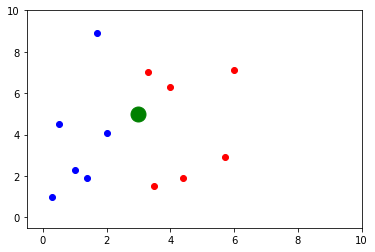

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

xBlue = np.array([0.3,0.5,1,1.4,1.7,2])
yBlue = np.array([1,4.5,2.3,1.9,8.9,4.1])

xRed = np.array([3.3,3.5,4,4.4,5.7,6])
yRed = np.array([7,1.5,6.3,1.9,2.9,7.1])

X = np.array([[0.3,1],[0.5,4.5],[1,2.3],[1.4,1.9],[1.7,8.9],[2,4.1],[3.3,7],[3.5,1.5],[4,6.3],[4.4,1.9],[5.7,2.9],[6,7.1]])
y = np.array([0,0,0,0,0,0,1,1,1,1,1,1]) # 0: blue class, 1: red class

plt.plot(xBlue, yBlue, 'ro', color = 'blue')
plt.plot(xRed, yRed, 'ro', color='red')
plt.plot(3,5,'ro',color='green', markersize=15)
plt.axis([-0.5,10,-0.5,10])

classifier = KNeighborsClassifier(n_neighbors=3) # this is the k value
classifier.fit(X,y)

pred = classifier.predict(np.array([[5,5]]))
print(pred)

plt.show()



In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [6]:
data = pd.read_csv('./credit_data.csv')

In [7]:
# Logistic regression accuracy: 93%
# we do better with knn: 98.5% !!!!!!!!
# 84%

#print(creditData.head())
#print(creditData.describe())
print(data.corr())

data.features = data[["income","age","loan"]]
data.target = data.default

data.features = preprocessing.MinMaxScaler().fit_transform(data.features) #HUGE DIFFERENCE !!!

feature_train, feature_test, target_train, target_test = train_test_split(data.features,data.target, test_size=0.3)

model = KNeighborsClassifier(n_neighbors=28)  # k value !!!
fittedModel = model.fit(feature_train, target_train)
predictions = fittedModel.predict(feature_test)

cross_valid_scores = []


          clientid    income       age      loan       LTI   default
clientid  1.000000  0.039280 -0.030341  0.018931  0.002538 -0.020145
income    0.039280  1.000000 -0.034984  0.441117 -0.019862  0.002284
age      -0.030341 -0.034984  1.000000  0.006561  0.021588 -0.444765
loan      0.018931  0.441117  0.006561  1.000000  0.847495  0.377160
LTI       0.002538 -0.019862  0.021588  0.847495  1.000000  0.433261
default  -0.020145  0.002284 -0.444765  0.377160  0.433261  1.000000


In [8]:

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,data.features,data.target,cv=10,scoring='accuracy')
    cross_valid_scores.append(scores.mean())
    

print("Optimal k with cross-validation: ", np.argmax(cross_valid_scores))    
    
print(confusion_matrix(target_test, predictions))

('Optimal k with cross-validation: ', 28)
[[516   2]
 [  9  73]]
